# U.S. Medical Insurance Costs

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
male      0.5052
female    0.4948
Name: sex, dtype: float64
0.9


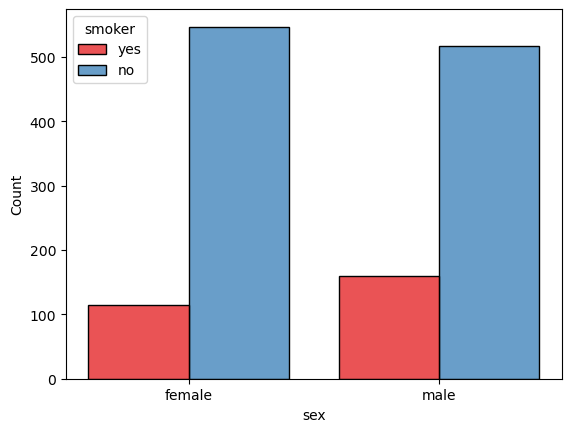

In [25]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style
%matplotlib inline
import seaborn as sns
import scipy.stats
import pylab as pab
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

### Import dataset and visualize. ###

df = pd.read_csv(r"C:\Users\stefa\Desktop\Data Science Projects\US Medical Insurance\insurance.csv")

# General overview; missing, or inconsistent data?

print(df.head(1338))
# observasions = print(len(df))
# print(df.describe().T)
# print(df.dtypes)
# df.info()

# Overview of the genders.

gender = df.get("sex").value_counts()
gender_percentage = round(gender/sum(gender), 4)

print(gender_percentage)
# Calculating the amount of smokers for each gender.

num_smokers = df.get("smoker").value_counts()
smoker_percentage = round(num_smokers/sum(num_smokers), 4)
agg_smokers = (df.groupby("smoker")[["sex"]]).value_counts()

smokers = df[["sex", "smoker"]]
male_smokers = smokers[smokers["sex"] == "male"]
female_smokers = smokers[smokers["sex"] == "female"]

# print("Male smokers: " + str(male_smokers.value_counts().sum()))
# print("Female smokers: " + str(female_smokers.value_counts().sum()))

# Visualize amount of smokers in a Bar-Chart

sns.histplot(data = df, x = "sex", hue = "smoker", 
    shrink = 0.8, 
    palette = "Set1",
    discrete = True,
    multiple= "dodge"
)

# What is the mean age of all the smokers and non smokers; men and women?

df_age_smoker = df[["age", "smoker"]]
age_smokers = df_age_smoker[df_age_smoker["smoker"] == "yes"]
age_non_smokers = df_age_smoker[df_age_smoker["smoker"] == "no"]

mean_age_smokers = round(np.mean(age_smokers.age), 1)
mean_age_non_smokers = round(np.mean(age_non_smokers.age), 1)

# Is there a significant difference in age between smokers an non smokers?

mean_diff_age_smokers = round(abs(mean_age_non_smokers - mean_age_smokers), 1)
print(mean_diff_age_smokers)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='Count'>

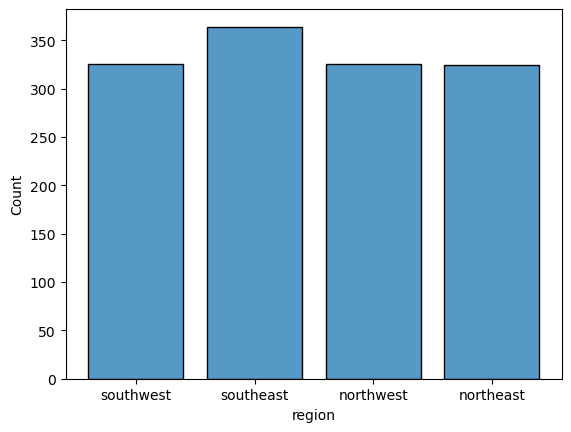

In [172]:
## How is the population distributed across the regions?

pop_distribution = df.region.value_counts()
print(pop_distribution)

plt.clf()
sns.histplot(df.region, 
             shrink = 0.8
            )

46


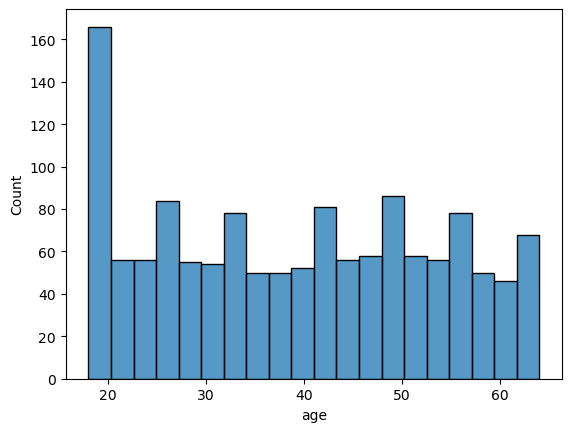

16.59% of individuals are between 18 and 22 years old!


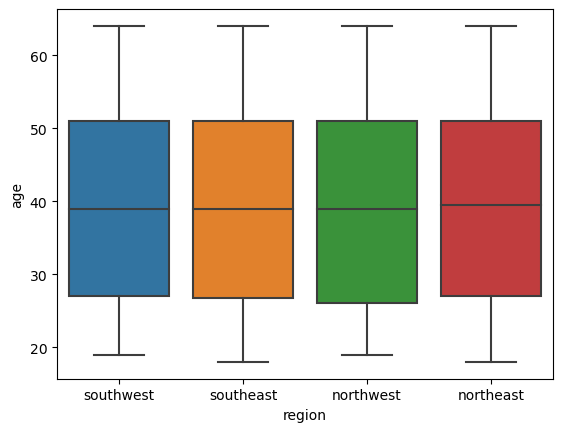

In [188]:
### How is age distributed across the regions? What is the age span of the individuals? ###

max_age = df.age.max()
min_age = df.age.min()
age_span = max_age - min_age

print(age_span)

# Plot the age distribution

plt.clf()
sns.histplot(df.age, bins = 20)
plt.show()

plt.clf()
sns.boxplot(df.region, df.age)

# Count the indivuals with aged from 18 to 22 years. What is the proportion in relation to the dataset?

ages_18_22 = []

for age in df.age:
    if age in range(18, 23):
        ages_18_22.append(age)  
        
print(str(round(len(ages_18_22) / len(df) * 100, 2)) + "% of individuals are between 18 and 22 years old!")        

bmi    33.355989
dtype: float64


<AxesSubplot:xlabel='region', ylabel='bmi'>

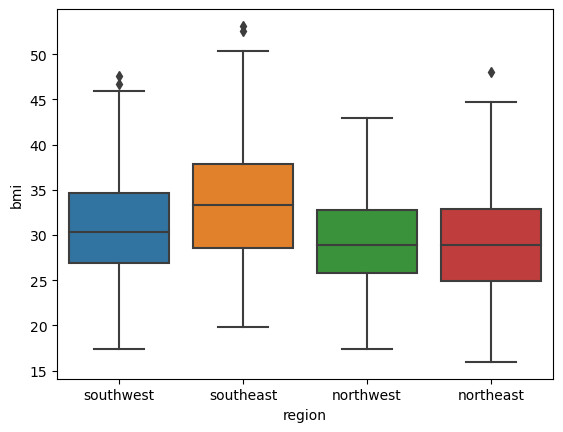

In [186]:
### How is BMI distributed across the regions? Which region has the highest mean BMI? ###

bmi_region = df[["region", "bmi"]]

southwest = bmi_region[bmi_region["region"] == "southwest"]
southeast = bmi_region[bmi_region["region"] == "southeast"]
northwest = bmi_region[bmi_region["region"] == "northwest"]
northeast = bmi_region[bmi_region["region"] == "northeast"]

def get_mean_region_bmi(region):
    
    mean_region_bmi = np.mean(region)

    return print(mean_region_bmi)


get_mean_region_bmi(southeast)

plt.clf()
sns.boxplot(df.region, df.bmi)

<Figure size 640x480 with 0 Axes>

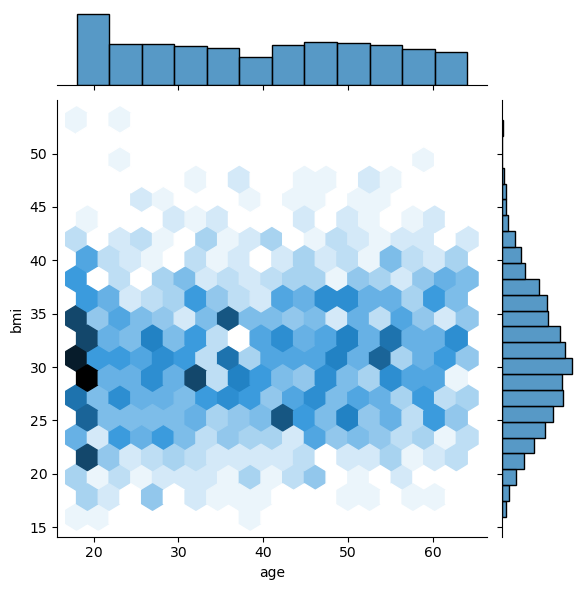

In [175]:
### How are age and BMI related; how are observations of BMI distributed across age? ###

plt.clf()
sns.jointplot(df.age, 
              df.bmi, 
              kind = "hex"
              )  

<Figure size 640x480 with 0 Axes>

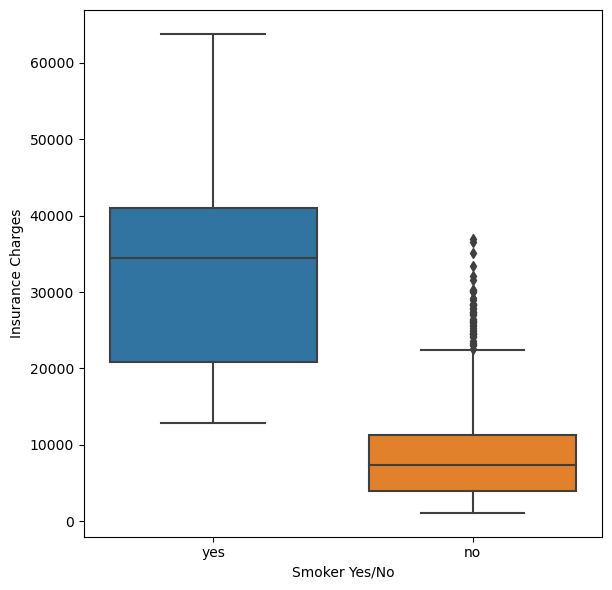

     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801
1121.8739


<Figure size 640x480 with 0 Axes>

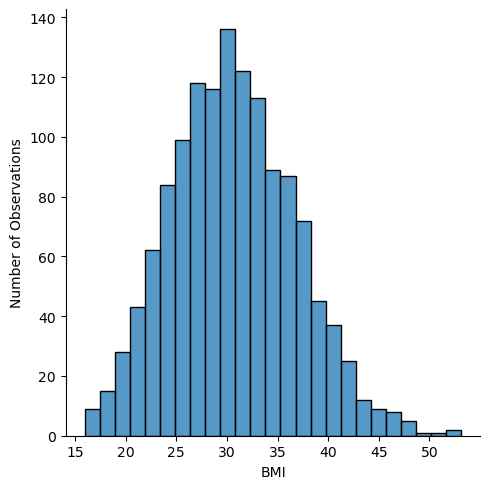

In [183]:
### Charges - general descriptive overview, distribution(s) across age, bmi, region and smokers ###

# Plot distribution of charges 
plt.clf()
plt.hist(df.charges, bins = 30)

# Jointplot of age and charges
plt.clf()
sns.jointplot(df.age, df.charges)

# Difference in distribution of insurance charges conditional on smokers
plt.clf()
boxplot = sns.boxplot(df.smoker, df.charges)
boxplot.set(xlabel = "Smoker Yes/No", ylabel = "Insurance Charges")
plt.show()

# Distribution of BMI
plt.clf()
distplot_bmi = sns.displot(df.bmi)
distplot_bmi.set(xlabel = "BMI", ylabel = "Number of Observations")

# Mean, min and max values of recorded charges
mean_charges = np.mean(df.charges)
min_charges = df.charges.min()
max_charges = df.charges.max()

# The individuals with the min and max charges
person_min_charges = df[df["charges"] == min_charges]
person_max_charges = df[df["charges"] == max_charges]

age_bmi_charges = df[["age", "bmi", "charges"]]

print(person_max_charges)
print(min_charges)

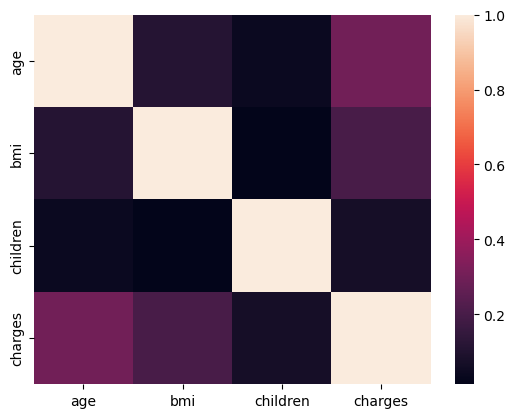

In [176]:
### Correlation-Matrix - Correlations between given variables except "smoker" and "region" ###

plt.clf()
sns.heatmap(df.corr("pearson"))
plt.show()

In [177]:
### Run a (linear) regression with the dependend variable being "charges" ###

# Preparing DataFrame for regression; converting strings to actual dummies and dropping "region".

reg_df = df.drop(columns = ["region"]) 
reg_df = pd.get_dummies(reg_df, columns = ["sex", "smoker"], drop_first = True)

# Regress charges on X ε {age, sex, bmi, smoker, children}

pred_charges = sm.OLS.from_formula("charges ~ age + sex_male + bmi + smoker_yes + children", reg_df).fit()
params = pred_charges.params
pred_charges.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:55:32   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex_male    -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
smoker_yes  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
children     474.4111    137.856      3.441      0.001     203.973     744.849
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
### Regress charges on X ε {age, sex, bmi * smoker, children} ###

# Generate interaction-term between "bmi" and "smoker_yes" and run regression on given variables

charges_pred_interact = sm.OLS.from_formula('charges ~ age + sex_male + children + bmi:smoker_yes', reg_df).fit()
charges_pred_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:48:13   Log-Likelihood:                -13346.
No. Observations:                1338   AIC:                         2.670e+04
Df Residuals:                    1333   BIC:                         2.673e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2769.0557    466.182     -5.940      0.000   -3683.586   -1854.526
age              269.1680     10.145     26.532      0.000     249.266     289.070
sex_male        -313.4391    285.853     -1.097      0.273    -874.209     247.331
children         498.6244    118.216      4.218      0.000     266.714     730.534
bmi:smoker_yes   810.7729     11.237     72.155      0.000     788.729     832.816
==============================================================================
Omnibus:                      549.953   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2488.281
Skew:                           1.929   Prob(JB):                         0.00
Kurtosis:                       8.455   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
### Predict the expected insurance charges for a given individual ###

# Create a dictionary with all variables and corresponding coefficients estimated in the previous regression

coef_labeled = {"intercept": params[0], 
                "age": params[1], 
                "sex_male": params[2], 
                "bmi": params[3], 
                "smoker_yes": params[4], 
                "children": params[5]
                }

print(coef_labeled)

# Define a function estimating the annual insurance costs for a given individual

def pred_insurance(age, sex_male, bmi, smoker_yes, children):

    # Define the domain for our dummies, sex_male and smoker_yes

    domain_dummy = (0, 1)

    # Check if the given arguments are part of the domain; if so, run the regression

    if (sex_male in domain_dummy) and (smoker_yes in domain_dummy):

        expected_charges = coef_labeled.get("intercept") + \
                           coef_labeled.get("age") * age + \
                           coef_labeled.get("sex_male") * sex_male + \
                           coef_labeled.get("bmi") * bmi + \
                           coef_labeled.get("smoker_yes") * smoker_yes + \
                           coef_labeled.get("children") * children
        
        return print("Estimated insurance charges for given individual are: $" + str(round(expected_charges, 2)))
    
    else:

        raise ValueError("Given values for dummy variables not in domain!")

pred_insurance(60, 0, 41, 0, 4)          

{'intercept': -12052.4619856647, 'age': 257.73498766924524, 'sex_male': -128.63985356969772, 'bmi': 322.3642144860735, 'smoker_yes': 23823.392530652607, 'children': 474.41112061268547}
Estimated insurance charges for given individual are: $18526.21


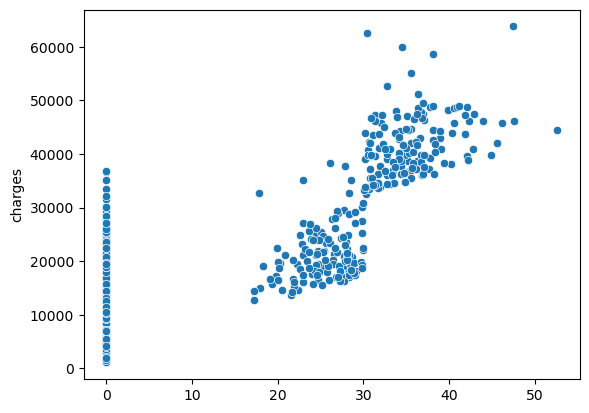

In [180]:
### Scatterplot of charges and bmi * smoker ###

plt.clf()
sns.scatterplot(reg_df.smoker_yes * reg_df.bmi, reg_df.charges)
plt.show()

39.20702541106129
30.714098360655726
age              64.00000
bmi              41.91000
children          4.00000
charges       36910.60803
sex_male          1.00000
smoker_yes        0.00000
dtype: float64


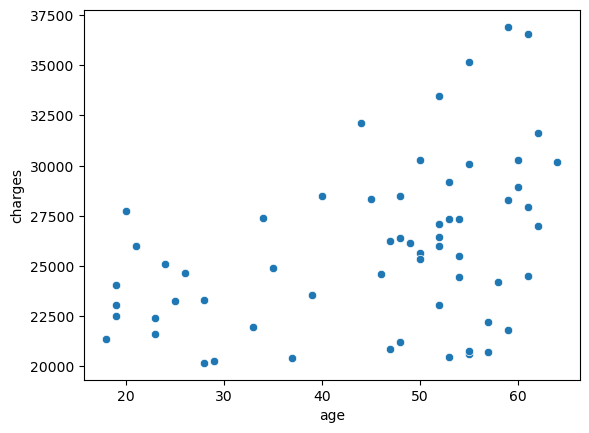

<AxesSubplot:>

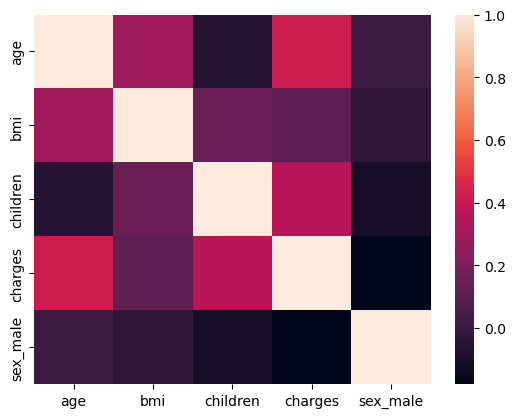

In [12]:
### Alot of non smoking individuals seem pay high insurance charges regardless, why? ###

# Create DataFrame with all non smoking individuals and charges above $20000
non_smokers_charges = reg_df[reg_df.smoker_yes == 0]
charges_greater_20000 = reg_df[reg_df.charges >= 20000]

df_charges = non_smokers_charges.merge(charges_greater_20000, how = "left")

highest_charges = df_charges[df_charges["charges"] >= 20000]

# Mean age across highest_charges
mean_age_among_highest_charges = np.mean(highest_charges.age)
mean_age_df = np.mean(df.age)
print(mean_age_df)

# Mean BMI across highest charges
mean_bmi_highest_charges = np.mean(highest_charges.bmi)
print(mean_bmi_highest_charges)

# The non smoking person with the highest charges recorded - let's call him "Peter"
Peter = highest_charges.max()
print(Peter)

# Correlation between charges and number of children
plt.clf()
sns.boxplot(highest_charges.children, highest_charges.charges)

# Correlation between charges and age
plt.clf()
sns.scatterplot(highest_charges.age, highest_charges.charges)
plt.show()

# Correlation-Matrix
sns.heatmap(highest_charges.drop(columns = ["smoker_yes"]).corr("pearson"))


In [165]:
### Run a regression on the non smoking individuals with the highest charges recorded ###

# Preparing the DataFrame by "dropping" the smokers (none of the individuals in this DataFrame is smoking)
reg_highest_charges = highest_charges.drop(columns = ["smoker_yes"])

# Running the regression on charges with X ε {age, bmi, children, sex_male}
model = sm.OLS.from_formula("charges ~ age + bmi + children + sex_male", data = reg_highest_charges).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7.301
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           8.35e-05
Time:                        17:45:51   Log-Likelihood:                -580.34
No. Observations:                  61   AIC:                             1171.
Df Residuals:                      56   BIC:                             1181.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.053e+04   2717.987      7.552      0.000    1.51e+04     2.6e+04
age          133.3863     32.980      4.044      0.000      67.319     199.453
bmi          -57.4515     86.862     -0.661      0.511    -231.458     116.555
children    1391.1590    405.555      3.430      0.001     578.735    2203.583
sex_male   -1144.5632    882.293     -1.297      0.200   -2912.009     622.883
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.279
Skew:                           0.139   Prob(JB):                        0.870
Kurtosis:                       3.182   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
### Make an interactive 3D scatterplot ###

fig = px.scatter_3d(highest_charges, x = "age", y = "children", z = "charges",
                    size = "charges",
                    size_max = 13,
                    color = "charges"
                    )
fig.show()